In [23]:
# notebook for playing with fourier transforms

# import
import numpy as np
import matplotlib.pyplot as plt
import math
import copy
import os
from scipy import misc
import imageio
from scipy import signal
from scipy.fft import fft, fftfreq, ifft2, fft2
np.random.seed(420)
%matplotlib inline
plt.rcParams['image.cmap'] = 'gray'
plt.rcParams['figure.figsize'] = (10.0, 10.0)
plt.rcParams['font.size'] = 22

# 1D Fourier Transforms

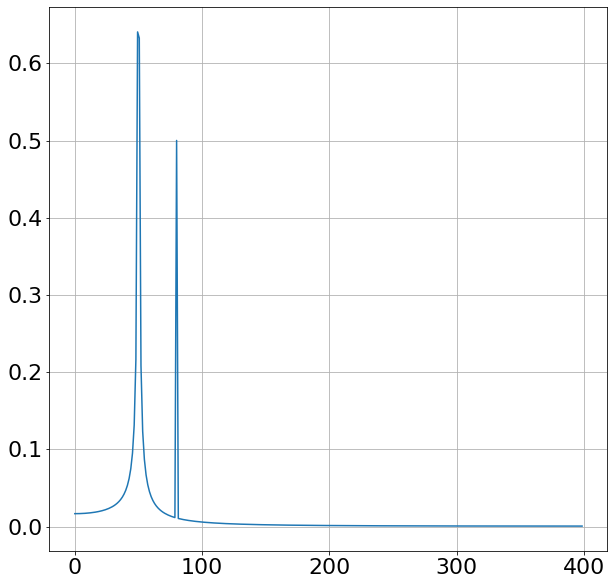

In [37]:
# plot the DFT for a sum of sine waves


# Number of sample points
N = 600
# sample spacing
T = 1.0 / 800.0

# time points
x = np.linspace(0.0, N*T, N, endpoint=False)

# signal at each time point
y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)

# fourier transform
yf = fft(y)
xf = fftfreq(N, T)[:N//2]

plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.grid()
plt.show()


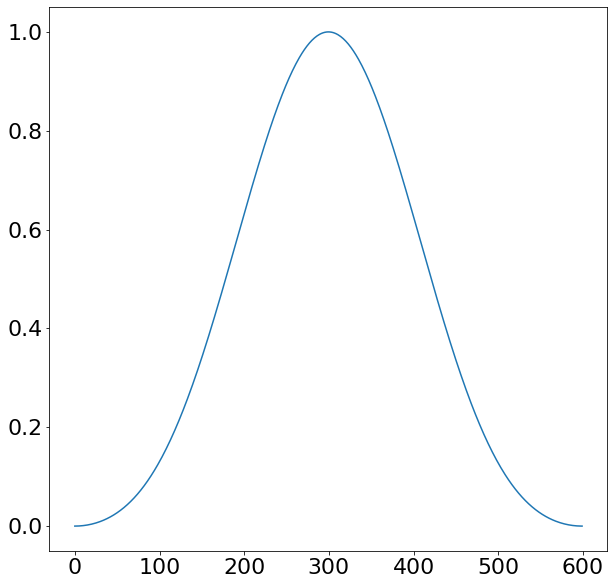

In [38]:
# Now show how you can reduce spectral splatter with a better window than a square
# go to https://docs.scipy.org/doc/scipy/reference/signal.windows.html for other windows

from scipy.signal.windows import blackman
# use a window
wind = blackman(N)

# plot the window shape
plt.plot(np.arange(N),wind)
plt.show()

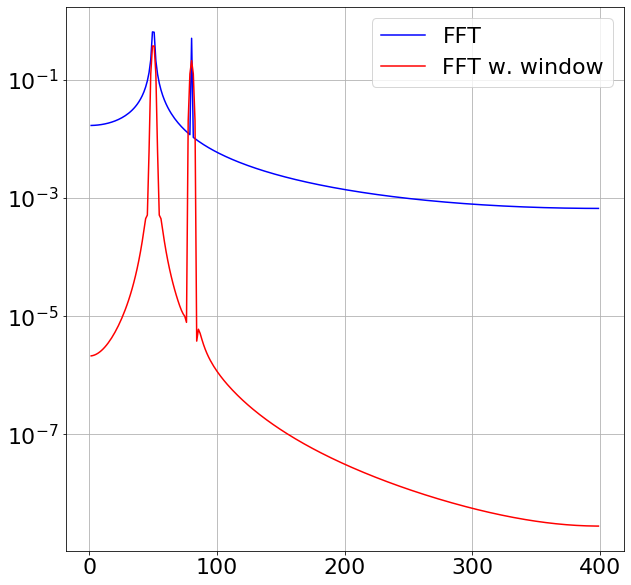

In [15]:
# plot the signal from above with and without the window
# IN LOG SPACE ON Y AXIS

# ywf is with window fft
ywf = fft(y*wind)
xf = fftfreq(N, T)[:N//2]

# plot
plt.semilogy(xf[1:N//2], 2.0/N * np.abs(yf[1:N//2]), '-b')
plt.semilogy(xf[1:N//2], 2.0/N * np.abs(ywf[1:N//2]), '-r')
plt.legend(['FFT', 'FFT w. window'])
plt.grid()
plt.show()

## Implement averaging over multiple segments of your signal

In [ ]:
# try cutting the signal into M segments and fourier transforming each segment

# 2D Fourier Transforms

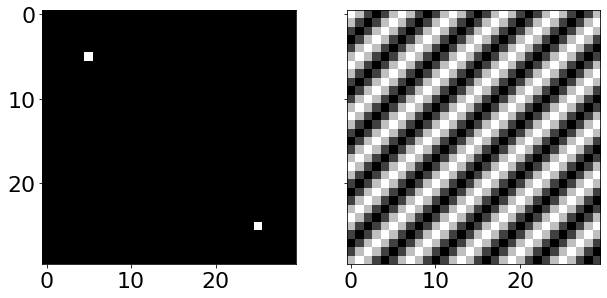

In [39]:
# plot 2D waves


# number of samples
N = 30
# frequency
freqx = 5
freqy = 5

# make all zeros except at frequency we want
xf = np.zeros((N,N))
xf[freqy%N, freqx%N] = 1
xf[(N-freqy)%N, (N-freqx)%N] = 1

# perform inverse fourier transform
Z = ifft2(xf)

# plot
f, ((ax1, ax2)) = plt.subplots(1, 2, sharex='col', sharey='row')
ax1.imshow(xf)
ax2.imshow(np.real(Z))
plt.show()

## DFT of image

image shape:  (267, 200)


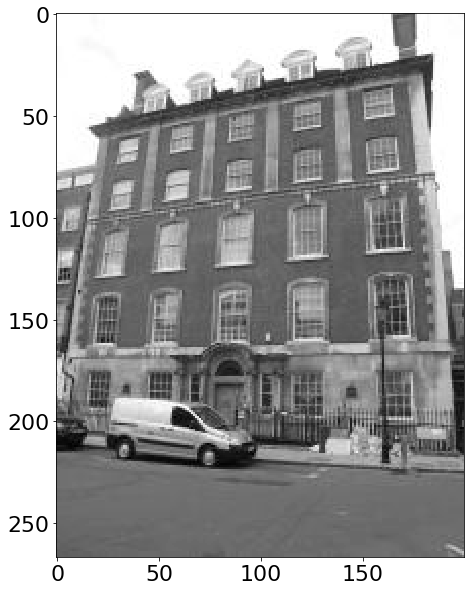

In [21]:
# load the image

image = imageio.imread('asst03_gatsby_image.bmp')
print ("image shape: ", image.shape)
plt.imshow(image)
plt.show()

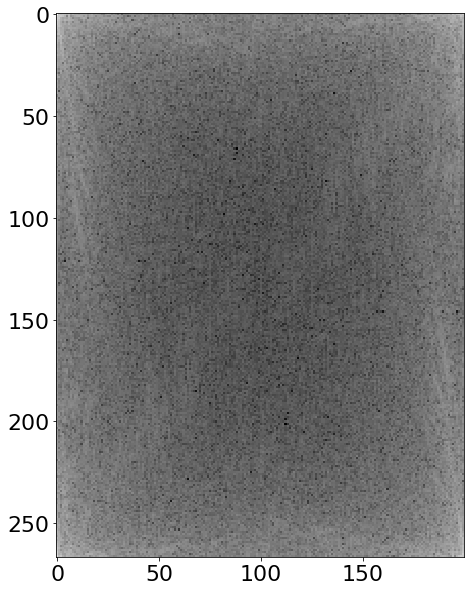

[[7346017.          382052.57863257  197494.7363916  ...  236799.16679057
   197494.7363916   382052.57863257]
 [ 607015.38595749 -185517.86861924   19709.91273432 ...   20422.63036223
   -37798.61465066  101071.61919661]
 [ 293317.04840681 -367945.24944308  -85289.45563078 ...   36258.54511356
   120866.08906903  -82509.44951224]
 ...
 [ 290985.99755427  109230.82826925  -43132.77397786 ...  -34029.88204491
   -67042.40155027 -221156.29464739]
 [ 293317.04840681  -82509.44951224  120866.08906903 ...  -40370.32364015
   -85289.45563078 -367945.24944308]
 [ 607015.38595749  101071.61919661  -37798.61465066 ...  -14693.38181079
    19709.91273432 -185517.86861924]]


In [30]:
# 2D fourier transform of image
yf2 = fft2(image)

plt.imshow(np.log(np.abs(yf2)))
plt.show()

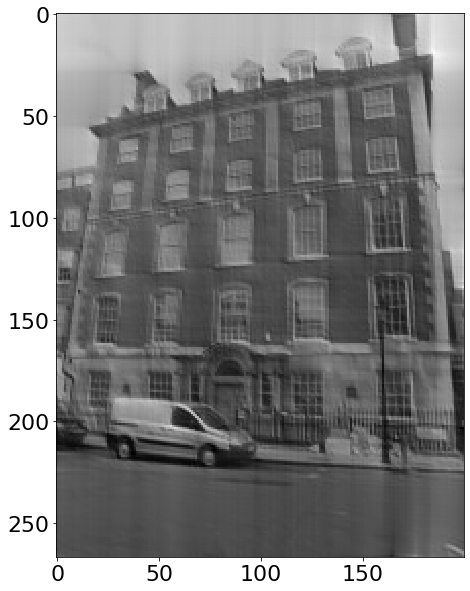

In [35]:
# first modify the fourier transform of the image
mod_yf2 = yf2
mod_yf2[100:,100:] = 0.0
Z2 = ifft2(mod_yf2)

# plot new image
plt.imshow(np.abs(Z2))
plt.show()

# Possible fun with audio signals (untested haha)

In [ ]:
from scipy.io import wavfile

samplerate = 44100

samplerate, data = wavfile.read(wav_fname)
print(f"number of channels = {data.shape[1]}")

# Remember SAMPLE_RATE = 44100 Hz is our playback rate
wavefile.write("mysinewave.wav", samplerate, normalized_tone)